In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-08-30 11:50:00.585406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:00.783827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:01.070462: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


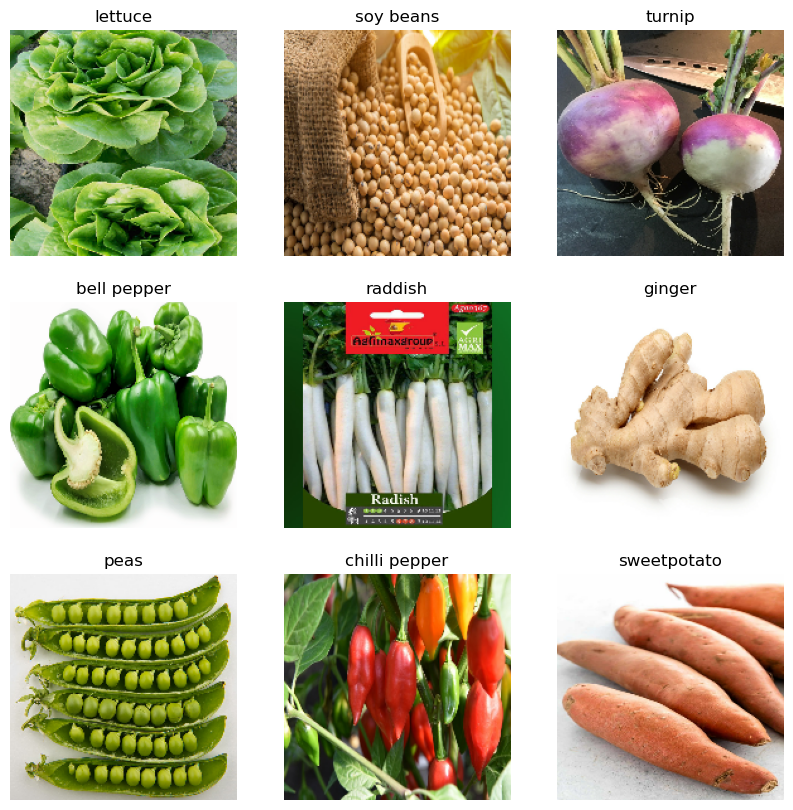

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-08-30 11:50:02.996473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:03.608638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:03.787011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 680ms/step - accuracy: 0.0234 - loss: 3.8879 

2024-08-30 11:50:05.303109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:54 1s/step - accuracy: 0.0330 - loss: 4.0267   

2024-08-30 11:50:06.291144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:23 920ms/step - accuracy: 0.0368 - loss: 4.0676

2024-08-30 11:50:09.254344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 726ms/step - accuracy: 0.0425 - loss: 3.9605

2024-08-30 11:50:13.282822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 51s 666ms/step - accuracy: 0.0456 - loss: 3.8886

2024-08-30 11:50:16.715172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 43s 617ms/step - accuracy: 0.0470 - loss: 3.8184

2024-08-30 11:50:20.493335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 599ms/step - accuracy: 0.0482 - loss: 3.7894

2024-08-30 11:50:22.635984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:22.750629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 34s 581ms/step - accuracy: 0.0499 - loss: 3.7505

2024-08-30 11:50:25.335045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 31s 566ms/step - accuracy: 0.0518 - loss: 3.7208

2024-08-30 11:50:27.737179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 24s 545ms/step - accuracy: 0.0559 - loss: 3.6676

2024-08-30 11:50:32.312044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 16s 546ms/step - accuracy: 0.0613 - loss: 3.6070

2024-08-30 11:50:39.858708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.0621 - loss: 3.5991

2024-08-30 11:50:40.982917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.0625 - loss: 3.5952

2024-08-30 11:50:41.783130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 10s 546ms/step - accuracy: 0.0658 - loss: 3.5649

2024-08-30 11:50:45.851642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:45.970628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 10s 546ms/step - accuracy: 0.0663 - loss: 3.5612

2024-08-30 11:50:46.567396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step - accuracy: 0.0685 - loss: 3.5436

2024-08-30 11:50:48.966877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step - accuracy: 0.0689 - loss: 3.5402

2024-08-30 11:50:49.335234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 0.0698 - loss: 3.5334

2024-08-30 11:50:50.477454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.0747 - loss: 3.4980

2024-08-30 11:50:55.881629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:56.625110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 562ms/step - accuracy: 0.0752 - loss: 3.4950 - val_accuracy: 0.3105 - val_loss: 2.3379
Epoch 2/25


2024-08-30 11:50:58.602823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:50:58.729394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 895ms/step - accuracy: 0.3125 - loss: 2.4293

2024-08-30 11:50:59.379678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 53s 562ms/step - accuracy: 0.2891 - loss: 2.5058 

2024-08-30 11:50:59.801360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 58s 619ms/step - accuracy: 0.2795 - loss: 2.5087

2024-08-30 11:51:00.887675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 59s 673ms/step - accuracy: 0.2616 - loss: 2.5903 

2024-08-30 11:51:04.496273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 48s 587ms/step - accuracy: 0.2618 - loss: 2.5956

2024-08-30 11:51:07.229877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 46s 573ms/step - accuracy: 0.2627 - loss: 2.5946

2024-08-30 11:51:08.231253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 568ms/step - accuracy: 0.2629 - loss: 2.5942

2024-08-30 11:51:08.790944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - accuracy: 0.2654 - loss: 2.5929

2024-08-30 11:51:13.402394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 35s 578ms/step - accuracy: 0.2660 - loss: 2.5831

2024-08-30 11:51:19.822371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 38s 656ms/step - accuracy: 0.2660 - loss: 2.5794

2024-08-30 11:51:24.393164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 38s 691ms/step - accuracy: 0.2662 - loss: 2.5732

2024-08-30 11:51:28.273057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 32s 699ms/step - accuracy: 0.2674 - loss: 2.5587

2024-08-30 11:51:35.067787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 22s 712ms/step - accuracy: 0.2706 - loss: 2.5392

2024-08-30 11:51:46.374559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 21s 712ms/step - accuracy: 0.2708 - loss: 2.5380

2024-08-30 11:51:47.019874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 18s 729ms/step - accuracy: 0.2719 - loss: 2.5316

2024-08-30 11:51:51.874982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - accuracy: 0.2721 - loss: 2.5303

2024-08-30 11:51:52.613554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 15s 728ms/step - accuracy: 0.2729 - loss: 2.5263

2024-08-30 11:51:54.679668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 13s 733ms/step - accuracy: 0.2735 - loss: 2.5237

2024-08-30 11:51:56.559150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 12s 729ms/step - accuracy: 0.2740 - loss: 2.5212

2024-08-30 11:51:57.396334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 11s 729ms/step - accuracy: 0.2742 - loss: 2.5201

2024-08-30 11:51:58.377045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 7s 735ms/step - accuracy: 0.2760 - loss: 2.5130

2024-08-30 11:52:03.347277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.2788 - loss: 2.5018

2024-08-30 11:52:10.588174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:52:11.770634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 778ms/step - accuracy: 0.2791 - loss: 2.5007 - val_accuracy: 0.5527 - val_loss: 1.5859
Epoch 3/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:27 901ms/step - accuracy: 0.2500 - loss: 2.2191

2024-08-30 11:52:15.581484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:52:15.686229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:52:15.892379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 2:08 1s/step - accuracy: 0.3056 - loss: 2.2795  

2024-08-30 11:52:18.992476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.3190 - loss: 2.3014

2024-08-30 11:52:20.235434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:29 988ms/step - accuracy: 0.3526 - loss: 2.2800

2024-08-30 11:52:21.444966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 941ms/step - accuracy: 0.3578 - loss: 2.2719

2024-08-30 11:52:22.345964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 58s 755ms/step - accuracy: 0.3716 - loss: 2.2054

2024-08-30 11:52:30.554366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 58s 778ms/step - accuracy: 0.3732 - loss: 2.1985

2024-08-30 11:52:33.326817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 54s 770ms/step - accuracy: 0.3759 - loss: 2.1844

2024-08-30 11:52:35.613725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 50s 757ms/step - accuracy: 0.3780 - loss: 2.1717

2024-08-30 11:52:38.414576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 42s 735ms/step - accuracy: 0.3840 - loss: 2.1443

2024-08-30 11:52:44.360083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 29s 712ms/step - accuracy: 0.3960 - loss: 2.0976

2024-08-30 11:52:54.773021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:52:54.797235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 21s 715ms/step - accuracy: 0.4033 - loss: 2.0696

2024-08-30 11:53:03.578567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 19s 709ms/step - accuracy: 0.4049 - loss: 2.0635

2024-08-30 11:53:05.347846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:53:05.407749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 18s 707ms/step - accuracy: 0.4054 - loss: 2.0616

2024-08-30 11:53:05.884288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 17s 704ms/step - accuracy: 0.4059 - loss: 2.0597

2024-08-30 11:53:06.111939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 13s 691ms/step - accuracy: 0.4085 - loss: 2.0505

2024-08-30 11:53:08.849404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 678ms/step - accuracy: 0.4116 - loss: 2.0397

2024-08-30 11:53:12.695635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:53:12.777360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 7s 684ms/step - accuracy: 0.4123 - loss: 2.0370

2024-08-30 11:53:14.452592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.4162 - loss: 2.0231

2024-08-30 11:53:21.329970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:53:22.122773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 706ms/step - accuracy: 0.4166 - loss: 2.0220 - val_accuracy: 0.7407 - val_loss: 1.0363
Epoch 4/25


2024-08-30 11:53:24.547309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.5938 - loss: 1.3149

2024-08-30 11:53:24.901631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:53:25.718082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:53:25.821014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 3:36 2s/step - accuracy: 0.5703 - loss: 1.4853

2024-08-30 11:53:27.849645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 2:25 2s/step - accuracy: 0.5677 - loss: 1.5265

2024-08-30 11:53:29.044485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 0.5365 - loss: 1.6147

2024-08-30 11:53:32.196102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 952ms/step - accuracy: 0.5245 - loss: 1.6422

2024-08-30 11:53:37.438046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 891ms/step - accuracy: 0.5216 - loss: 1.6530

2024-08-30 11:53:41.013595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 59s 839ms/step - accuracy: 0.5217 - loss: 1.6475 

2024-08-30 11:53:47.008301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 55s 827ms/step - accuracy: 0.5220 - loss: 1.6442

2024-08-30 11:53:50.120581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 47s 789ms/step - accuracy: 0.5240 - loss: 1.6341

2024-08-30 11:53:54.491178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 38s 763ms/step - accuracy: 0.5281 - loss: 1.6189

2024-08-30 11:54:00.300018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 26s 749ms/step - accuracy: 0.5364 - loss: 1.5901

2024-08-30 11:54:10.691553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 25s 742ms/step - accuracy: 0.5373 - loss: 1.5868

2024-08-30 11:54:11.820553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 23s 736ms/step - accuracy: 0.5381 - loss: 1.5838

2024-08-30 11:54:12.905484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 21s 729ms/step - accuracy: 0.5388 - loss: 1.5809

2024-08-30 11:54:14.121806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 21s 726ms/step - accuracy: 0.5391 - loss: 1.5795

2024-08-30 11:54:14.672130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 14s 703ms/step - accuracy: 0.5419 - loss: 1.5679

2024-08-30 11:54:18.618414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 13s 697ms/step - accuracy: 0.5426 - loss: 1.5652

2024-08-30 11:54:19.519487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 12s 694ms/step - accuracy: 0.5429 - loss: 1.5639

2024-08-30 11:54:19.978658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 11s 690ms/step - accuracy: 0.5436 - loss: 1.5615

2024-08-30 11:54:21.036655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.5451 - loss: 1.5562

2024-08-30 11:54:23.620442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.5485 - loss: 1.5448

2024-08-30 11:54:28.575887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:54:29.268204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 678ms/step - accuracy: 0.5488 - loss: 1.5438 - val_accuracy: 0.8319 - val_loss: 0.7071
Epoch 5/25


2024-08-30 11:54:30.957915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:54:31.321573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:54:31.453655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 56s 585ms/step - accuracy: 0.6641 - loss: 1.3257 

2024-08-30 11:54:32.309329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 55s 596ms/step - accuracy: 0.6751 - loss: 1.2805

2024-08-30 11:54:33.320963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:54:33.500003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 54s 591ms/step - accuracy: 0.6848 - loss: 1.2399

2024-08-30 11:54:34.811191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 51s 574ms/step - accuracy: 0.6881 - loss: 1.2172

2024-08-30 11:54:35.728880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 564ms/step - accuracy: 0.6779 - loss: 1.1789

2024-08-30 11:54:41.538327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 45s 647ms/step - accuracy: 0.6784 - loss: 1.1507

2024-08-30 11:54:49.176521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 45s 662ms/step - accuracy: 0.6789 - loss: 1.1476

2024-08-30 11:54:51.108422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 36s 659ms/step - accuracy: 0.6855 - loss: 1.1125

2024-08-30 11:54:59.467502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 28s 689ms/step - accuracy: 0.6913 - loss: 1.0864

2024-08-30 11:55:09.803547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 28s 686ms/step - accuracy: 0.6917 - loss: 1.0849

2024-08-30 11:55:10.291596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 22s 695ms/step - accuracy: 0.6946 - loss: 1.0737

2024-08-30 11:55:16.262532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 19s 710ms/step - accuracy: 0.6963 - loss: 1.0675

2024-08-30 11:55:20.800170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 17s 711ms/step - accuracy: 0.6972 - loss: 1.0641

2024-08-30 11:55:22.976516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:55:23.088439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 710ms/step - accuracy: 0.6975 - loss: 1.0630

2024-08-30 11:55:23.605046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:55:23.736148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step - accuracy: 0.6987 - loss: 1.0587

2024-08-30 11:55:29.079570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 13s 742ms/step - accuracy: 0.6994 - loss: 1.0564

2024-08-30 11:55:30.955884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 736ms/step - accuracy: 0.7009 - loss: 1.0506 

2024-08-30 11:55:33.615506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.7044 - loss: 1.0369

2024-08-30 11:55:41.840077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:55:42.622782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 750ms/step - accuracy: 0.7046 - loss: 1.0359 - val_accuracy: 0.8718 - val_loss: 0.4967
Epoch 6/25


2024-08-30 11:55:44.506007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 0.7500 - loss: 1.0980

2024-08-30 11:55:45.606715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 727ms/step - accuracy: 0.7578 - loss: 0.9954

2024-08-30 11:55:47.097683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:50 1s/step - accuracy: 0.7587 - loss: 0.9387   

2024-08-30 11:55:48.039725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 836ms/step - accuracy: 0.7730 - loss: 0.8636

2024-08-30 11:55:49.259019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 777ms/step - accuracy: 0.7753 - loss: 0.8463

2024-08-30 11:55:49.519393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:55:49.747374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:55:50.222413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 58s 763ms/step - accuracy: 0.7805 - loss: 0.7709 

2024-08-30 11:56:01.069211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 46s 721ms/step - accuracy: 0.7860 - loss: 0.7391

2024-08-30 11:56:08.931503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 43s 702ms/step - accuracy: 0.7877 - loss: 0.7318

2024-08-30 11:56:10.302066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 39s 686ms/step - accuracy: 0.7906 - loss: 0.7211

2024-08-30 11:56:12.318477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 35s 685ms/step - accuracy: 0.7951 - loss: 0.7052

2024-08-30 11:56:17.145485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 32s 700ms/step - accuracy: 0.7988 - loss: 0.6929

2024-08-30 11:56:20.745680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 24s 672ms/step - accuracy: 0.8057 - loss: 0.6704

2024-08-30 11:56:26.281278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 18s 657ms/step - accuracy: 0.8108 - loss: 0.6537

2024-08-30 11:56:31.168301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 651ms/step - accuracy: 0.8131 - loss: 0.6453

2024-08-30 11:56:33.721777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 14s 649ms/step - accuracy: 0.8136 - loss: 0.6437

2024-08-30 11:56:34.538927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 645ms/step - accuracy: 0.8144 - loss: 0.6405

2024-08-30 11:56:35.460503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 12s 643ms/step - accuracy: 0.8149 - loss: 0.6390

2024-08-30 11:56:35.930929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 10s 638ms/step - accuracy: 0.8157 - loss: 0.6359

2024-08-30 11:56:36.777166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:56:36.816771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 632ms/step - accuracy: 0.8172 - loss: 0.6303

2024-08-30 11:56:38.855821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.8217 - loss: 0.6141

2024-08-30 11:56:45.627454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:56:46.398899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 643ms/step - accuracy: 0.8220 - loss: 0.6130 - val_accuracy: 0.9231 - val_loss: 0.3905
Epoch 7/25


2024-08-30 11:56:48.264375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 761ms/step - accuracy: 0.8438 - loss: 0.4984

2024-08-30 11:56:48.959398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 734ms/step - accuracy: 0.8359 - loss: 0.4659

2024-08-30 11:56:49.599999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:56:49.879406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 722ms/step - accuracy: 0.8472 - loss: 0.4188

2024-08-30 11:56:53.193886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 54s 646ms/step - accuracy: 0.8602 - loss: 0.4009

2024-08-30 11:56:57.146095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 53s 650ms/step - accuracy: 0.8639 - loss: 0.3957

2024-08-30 11:56:57.865996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 52s 643ms/step - accuracy: 0.8653 - loss: 0.3937

2024-08-30 11:56:58.505029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 51s 635ms/step - accuracy: 0.8670 - loss: 0.3912

2024-08-30 11:56:59.182282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 35s 575ms/step - accuracy: 0.8804 - loss: 0.3791

2024-08-30 11:57:09.820184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 33s 572ms/step - accuracy: 0.8814 - loss: 0.3776

2024-08-30 11:57:10.808196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 31s 573ms/step - accuracy: 0.8833 - loss: 0.3747

2024-08-30 11:57:13.257368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 31s 581ms/step - accuracy: 0.8838 - loss: 0.3738

2024-08-30 11:57:13.835575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 28s 604ms/step - accuracy: 0.8865 - loss: 0.3694

2024-08-30 11:57:19.430159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 24s 661ms/step - accuracy: 0.8893 - loss: 0.3645

2024-08-30 11:57:28.860590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 22s 669ms/step - accuracy: 0.8900 - loss: 0.3635

2024-08-30 11:57:31.167241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 17s 648ms/step - accuracy: 0.8915 - loss: 0.3614

2024-08-30 11:57:34.462813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 644ms/step - accuracy: 0.8921 - loss: 0.3606

2024-08-30 11:57:35.765859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 644ms/step - accuracy: 0.8923 - loss: 0.3603

2024-08-30 11:57:36.892562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 13s 644ms/step - accuracy: 0.8927 - loss: 0.3597

2024-08-30 11:57:37.884874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:37.905043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 10s 637ms/step - accuracy: 0.8934 - loss: 0.3586

2024-08-30 11:57:39.872629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 10s 635ms/step - accuracy: 0.8935 - loss: 0.3582

2024-08-30 11:57:40.279388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.8965 - loss: 0.3523

2024-08-30 11:57:48.529595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:49.178748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 637ms/step - accuracy: 0.8967 - loss: 0.3519 - val_accuracy: 0.9516 - val_loss: 0.3205
Epoch 8/25


2024-08-30 11:57:50.705771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:50.730994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:51.556949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:51.590133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:51.859683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:52.060226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 44s 478ms/step - accuracy: 0.9028 - loss: 0.2313

2024-08-30 11:57:54.923468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:57:54.983645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 34s 485ms/step - accuracy: 0.9217 - loss: 0.2464

2024-08-30 11:58:05.206544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 31s 484ms/step - accuracy: 0.9248 - loss: 0.2461

2024-08-30 11:58:07.673022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 28s 497ms/step - accuracy: 0.9294 - loss: 0.2423

2024-08-30 11:58:11.865729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 28s 496ms/step - accuracy: 0.9300 - loss: 0.2416

2024-08-30 11:58:12.461302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 26s 495ms/step - accuracy: 0.9319 - loss: 0.2389

2024-08-30 11:58:14.247164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.9355 - loss: 0.2327

2024-08-30 11:58:19.086735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 17s 492ms/step - accuracy: 0.9377 - loss: 0.2277

2024-08-30 11:58:23.175793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 14s 527ms/step - accuracy: 0.9395 - loss: 0.2235

2024-08-30 11:58:28.977924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 12s 537ms/step - accuracy: 0.9406 - loss: 0.2210

2024-08-30 11:58:32.443314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 8s 545ms/step - accuracy: 0.9421 - loss: 0.2175

2024-08-30 11:58:37.169880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:58:37.204438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step - accuracy: 0.9423 - loss: 0.2172

2024-08-30 11:58:37.900712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 546ms/step - accuracy: 0.9425 - loss: 0.2169

2024-08-30 11:58:38.427648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.9432 - loss: 0.2157

2024-08-30 11:58:40.685391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:58:40.859364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9446 - loss: 0.2131

2024-08-30 11:58:46.086171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:58:47.088893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 585ms/step - accuracy: 0.9447 - loss: 0.2129 - val_accuracy: 0.9601 - val_loss: 0.2721
Epoch 9/25


2024-08-30 11:58:49.547814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.9392 - loss: 0.2128

2024-08-30 11:58:52.519452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:58:52.791950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 894ms/step - accuracy: 0.9466 - loss: 0.1944

2024-08-30 11:58:53.140332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:58:53.795770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 899ms/step - accuracy: 0.9491 - loss: 0.1814

2024-08-30 11:58:54.875210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 831ms/step - accuracy: 0.9507 - loss: 0.1747

2024-08-30 11:58:55.610820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 43s 602ms/step - accuracy: 0.9638 - loss: 0.1559

2024-08-30 11:59:05.352129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:59:05.372598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 610ms/step - accuracy: 0.9640 - loss: 0.1554

2024-08-30 11:59:06.642289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 46s 761ms/step - accuracy: 0.9653 - loss: 0.1507

2024-08-30 11:59:17.854848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 45s 775ms/step - accuracy: 0.9655 - loss: 0.1497

2024-08-30 11:59:19.972461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 35s 819ms/step - accuracy: 0.9666 - loss: 0.1432

2024-08-30 11:59:34.906155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 30s 835ms/step - accuracy: 0.9670 - loss: 0.1408

2024-08-30 11:59:40.736499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 29s 833ms/step - accuracy: 0.9670 - loss: 0.1404

2024-08-30 11:59:41.742167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 28s 829ms/step - accuracy: 0.9672 - loss: 0.1396

2024-08-30 11:59:43.174294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 26s 829ms/step - accuracy: 0.9673 - loss: 0.1388

2024-08-30 11:59:44.591027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 22s 824ms/step - accuracy: 0.9676 - loss: 0.1370

2024-08-30 11:59:48.231861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 21s 823ms/step - accuracy: 0.9676 - loss: 0.1367

2024-08-30 11:59:48.949529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 18s 821ms/step - accuracy: 0.9677 - loss: 0.1360

2024-08-30 11:59:51.397757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 17s 815ms/step - accuracy: 0.9678 - loss: 0.1357

2024-08-30 11:59:52.564527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 11:59:52.659132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 16s 812ms/step - accuracy: 0.9679 - loss: 0.1355

2024-08-30 11:59:53.024274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.9683 - loss: 0.1343

2024-08-30 12:00:04.030081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:00:04.710701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 782ms/step - accuracy: 0.9683 - loss: 0.1343 - val_accuracy: 0.9573 - val_loss: 0.3345
Epoch 10/25


2024-08-30 12:00:06.749375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 868ms/step - accuracy: 0.9688 - loss: 0.0398

2024-08-30 12:00:06.967526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:00:07.309085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 556ms/step - accuracy: 0.9727 - loss: 0.0782

2024-08-30 12:00:08.722868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 47s 535ms/step - accuracy: 0.9714 - loss: 0.1038

2024-08-30 12:00:11.315649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 44s 523ms/step - accuracy: 0.9716 - loss: 0.1115

2024-08-30 12:00:13.055691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 44s 523ms/step - accuracy: 0.9716 - loss: 0.1126

2024-08-30 12:00:13.499139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - accuracy: 0.9713 - loss: 0.1158

2024-08-30 12:00:15.850274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 38s 559ms/step - accuracy: 0.9707 - loss: 0.1357

2024-08-30 12:00:22.723146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 37s 556ms/step - accuracy: 0.9706 - loss: 0.1373

2024-08-30 12:00:23.795960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.9697 - loss: 0.1447

2024-08-30 12:00:28.554918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.9696 - loss: 0.1451

2024-08-30 12:00:29.340265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9697 - loss: 0.1464

2024-08-30 12:00:33.350446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9697 - loss: 0.1464

2024-08-30 12:00:33.999001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 20s 611ms/step - accuracy: 0.9706 - loss: 0.1438

2024-08-30 12:00:45.815704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 17s 639ms/step - accuracy: 0.9710 - loss: 0.1422

2024-08-30 12:00:51.210899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 17s 637ms/step - accuracy: 0.9711 - loss: 0.1419

2024-08-30 12:00:51.907423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 632ms/step - accuracy: 0.9713 - loss: 0.1411

2024-08-30 12:00:53.261474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.9716 - loss: 0.1397

2024-08-30 12:00:57.475560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 11s 648ms/step - accuracy: 0.9717 - loss: 0.1394

2024-08-30 12:00:58.568377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 10s 646ms/step - accuracy: 0.9718 - loss: 0.1391

2024-08-30 12:00:58.870497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:00:59.063760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.9720 - loss: 0.1381

2024-08-30 12:01:01.144561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9726 - loss: 0.1357

2024-08-30 12:01:07.826407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:01:08.466946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 651ms/step - accuracy: 0.9726 - loss: 0.1356 - val_accuracy: 0.9573 - val_loss: 0.3375
Epoch 11/25


2024-08-30 12:01:10.897876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 50s 530ms/step - accuracy: 1.0000 - loss: 0.0524

2024-08-30 12:01:11.838415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:01:11.839632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:01:12.058651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 47s 527ms/step - accuracy: 0.9866 - loss: 0.0604

2024-08-30 12:01:14.503921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 47s 526ms/step - accuracy: 0.9853 - loss: 0.0620

2024-08-30 12:01:15.212005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 48s 599ms/step - accuracy: 0.9830 - loss: 0.0654

2024-08-30 12:01:20.881131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 44s 588ms/step - accuracy: 0.9828 - loss: 0.0685

2024-08-30 12:01:23.961642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 575ms/step - accuracy: 0.9826 - loss: 0.0694

2024-08-30 12:01:25.478669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 40s 573ms/step - accuracy: 0.9825 - loss: 0.0698

2024-08-30 12:01:26.130956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 39s 567ms/step - accuracy: 0.9824 - loss: 0.0705

2024-08-30 12:01:27.090240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 32s 551ms/step - accuracy: 0.9817 - loss: 0.0777

2024-08-30 12:01:32.491333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.9815 - loss: 0.0819

2024-08-30 12:01:34.535027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 25s 543ms/step - accuracy: 0.9812 - loss: 0.0874

2024-08-30 12:01:38.533466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 19s 532ms/step - accuracy: 0.9811 - loss: 0.0908

2024-08-30 12:01:43.393278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 15s 530ms/step - accuracy: 0.9812 - loss: 0.0920

2024-08-30 12:01:46.876126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 15s 568ms/step - accuracy: 0.9813 - loss: 0.0929

2024-08-30 12:01:51.235480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 573ms/step - accuracy: 0.9813 - loss: 0.0937

2024-08-30 12:01:53.349396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 12s 583ms/step - accuracy: 0.9814 - loss: 0.0941

2024-08-30 12:01:55.135273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:01:55.160288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 11s 583ms/step - accuracy: 0.9814 - loss: 0.0944

2024-08-30 12:01:56.536924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 10s 589ms/step - accuracy: 0.9815 - loss: 0.0947

2024-08-30 12:01:58.150712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:01:58.226868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9818 - loss: 0.0966

2024-08-30 12:02:12.773773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:02:13.521819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 659ms/step - accuracy: 0.9818 - loss: 0.0967 - val_accuracy: 0.9573 - val_loss: 0.2676
Epoch 12/25


2024-08-30 12:02:15.677812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:08 1s/step - accuracy: 1.0000 - loss: 0.0149

2024-08-30 12:02:16.784956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:02:16.829869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:02:16.920069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 1.0000 - loss: 0.0226

2024-08-30 12:02:19.139699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:02:19.465021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:28 1s/step - accuracy: 0.9922 - loss: 0.0529   

2024-08-30 12:02:26.098345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.9894 - loss: 0.0668

2024-08-30 12:02:28.219619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 852ms/step - accuracy: 0.9840 - loss: 0.0999

2024-08-30 12:02:36.208774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 57s 823ms/step - accuracy: 0.9830 - loss: 0.1054

2024-08-30 12:02:38.927135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 53s 805ms/step - accuracy: 0.9821 - loss: 0.1091

2024-08-30 12:02:41.565174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 48s 840ms/step - accuracy: 0.9812 - loss: 0.1128

2024-08-30 12:02:49.469438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 38s 776ms/step - accuracy: 0.9803 - loss: 0.1144

2024-08-30 12:02:53.944471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 33s 761ms/step - accuracy: 0.9801 - loss: 0.1141

2024-08-30 12:02:56.926510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 26s 743ms/step - accuracy: 0.9799 - loss: 0.1128

2024-08-30 12:03:02.533441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 24s 738ms/step - accuracy: 0.9798 - loss: 0.1124

2024-08-30 12:03:03.657654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 19s 717ms/step - accuracy: 0.9797 - loss: 0.1116

2024-08-30 12:03:06.851114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 710ms/step - accuracy: 0.9797 - loss: 0.1115

2024-08-30 12:03:08.407938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 11s 694ms/step - accuracy: 0.9795 - loss: 0.1112

2024-08-30 12:03:12.181461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 11s 691ms/step - accuracy: 0.9795 - loss: 0.1112

2024-08-30 12:03:12.812974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 10s 689ms/step - accuracy: 0.9795 - loss: 0.1112

2024-08-30 12:03:13.097123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 688ms/step - accuracy: 0.9795 - loss: 0.1111 

2024-08-30 12:03:13.758109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:03:13.880168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.9794 - loss: 0.1107

2024-08-30 12:03:21.643076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:03:22.424267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 699ms/step - accuracy: 0.9794 - loss: 0.1107 - val_accuracy: 0.9487 - val_loss: 0.3042
Epoch 13/25


2024-08-30 12:03:24.905793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 58s 619ms/step - accuracy: 0.9733 - loss: 0.0551

2024-08-30 12:03:27.166011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:03:27.372813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:03:27.383199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 55s 626ms/step - accuracy: 0.9796 - loss: 0.0505

2024-08-30 12:03:31.068853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 53s 612ms/step - accuracy: 0.9802 - loss: 0.0502

2024-08-30 12:03:31.470477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 51s 599ms/step - accuracy: 0.9805 - loss: 0.0510

2024-08-30 12:03:32.112029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 810ms/step - accuracy: 0.9820 - loss: 0.0521

2024-08-30 12:03:38.142510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 47s 695ms/step - accuracy: 0.9834 - loss: 0.0691

2024-08-30 12:03:45.446833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 43s 678ms/step - accuracy: 0.9837 - loss: 0.0714

2024-08-30 12:03:48.242691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 38s 667ms/step - accuracy: 0.9839 - loss: 0.0741

2024-08-30 12:03:51.613301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 33s 651ms/step - accuracy: 0.9841 - loss: 0.0756

2024-08-30 12:03:54.813995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 30s 642ms/step - accuracy: 0.9843 - loss: 0.0762

2024-08-30 12:03:56.629819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 24s 624ms/step - accuracy: 0.9848 - loss: 0.0762

2024-08-30 12:04:01.953648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/step - accuracy: 0.9850 - loss: 0.0759

2024-08-30 12:04:04.810868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 15s 612ms/step - accuracy: 0.9854 - loss: 0.0754

2024-08-30 12:04:09.554627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:04:09.594656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 611ms/step - accuracy: 0.9854 - loss: 0.0753

2024-08-30 12:04:10.074476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:04:10.195665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 610ms/step - accuracy: 0.9855 - loss: 0.0753

2024-08-30 12:04:10.583617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 13s 608ms/step - accuracy: 0.9855 - loss: 0.0752

2024-08-30 12:04:11.020991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 604ms/step - accuracy: 0.9855 - loss: 0.0752

2024-08-30 12:04:11.878192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step - accuracy: 0.9856 - loss: 0.0751

2024-08-30 12:04:13.312258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9858 - loss: 0.0752

2024-08-30 12:04:21.294447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:04:21.977578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 602ms/step - accuracy: 0.9858 - loss: 0.0752 - val_accuracy: 0.9601 - val_loss: 0.3232
Epoch 14/25


2024-08-30 12:04:23.846090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 56s 585ms/step - accuracy: 1.0000 - loss: 0.0281

2024-08-30 12:04:25.757134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 52s 569ms/step - accuracy: 1.0000 - loss: 0.0303

2024-08-30 12:04:27.493359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:04:27.504890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 52s 574ms/step - accuracy: 0.9983 - loss: 0.0339

2024-08-30 12:04:28.008065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 51s 565ms/step - accuracy: 0.9960 - loss: 0.0377

2024-08-30 12:04:28.589029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 50s 585ms/step - accuracy: 0.9923 - loss: 0.0451

2024-08-30 12:04:31.244003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 49s 593ms/step - accuracy: 0.9913 - loss: 0.0513

2024-08-30 12:04:33.146676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 46s 593ms/step - accuracy: 0.9903 - loss: 0.0629

2024-08-30 12:04:36.176859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 41s 589ms/step - accuracy: 0.9880 - loss: 0.0753

2024-08-30 12:04:40.968112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 32s 566ms/step - accuracy: 0.9864 - loss: 0.0812

2024-08-30 12:04:47.023126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 32s 567ms/step - accuracy: 0.9864 - loss: 0.0814

2024-08-30 12:04:47.797315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 21s 587ms/step - accuracy: 0.9859 - loss: 0.0812

2024-08-30 12:05:00.278856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 18s 592ms/step - accuracy: 0.9861 - loss: 0.0802

2024-08-30 12:05:04.071270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 15s 590ms/step - accuracy: 0.9862 - loss: 0.0796

2024-08-30 12:05:06.399240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 620ms/step - accuracy: 0.9862 - loss: 0.0793

2024-08-30 12:05:10.370383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 630ms/step - accuracy: 0.9863 - loss: 0.0792

2024-08-30 12:05:11.652815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:11.708939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:11.866955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 13s 633ms/step - accuracy: 0.9863 - loss: 0.0789

2024-08-30 12:05:13.143185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 660ms/step - accuracy: 0.9864 - loss: 0.0780

2024-08-30 12:05:19.639801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:19.823594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:20.064743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9867 - loss: 0.0765

2024-08-30 12:05:27.831269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:28.562106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 687ms/step - accuracy: 0.9867 - loss: 0.0764 - val_accuracy: 0.9573 - val_loss: 0.3072
Epoch 15/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 1.0000 - loss: 0.0148

2024-08-30 12:05:33.120133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 59s 627ms/step - accuracy: 0.9913 - loss: 0.0313 

2024-08-30 12:05:34.492747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:34.701875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:05:35.184653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 847ms/step - accuracy: 0.9864 - loss: 0.0388

2024-08-30 12:05:36.575562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 836ms/step - accuracy: 0.9836 - loss: 0.0458

2024-08-30 12:05:40.443885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 804ms/step - accuracy: 0.9838 - loss: 0.0456

2024-08-30 12:05:41.315536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 58s 725ms/step - accuracy: 0.9836 - loss: 0.0560

2024-08-30 12:05:45.263736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 52s 694ms/step - accuracy: 0.9837 - loss: 0.0596

2024-08-30 12:05:48.046738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 42s 657ms/step - accuracy: 0.9835 - loss: 0.0649

2024-08-30 12:05:54.766190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 41s 661ms/step - accuracy: 0.9835 - loss: 0.0654

2024-08-30 12:05:55.454863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - accuracy: 0.9833 - loss: 0.0672

2024-08-30 12:05:57.900326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 34s 645ms/step - accuracy: 0.9826 - loss: 0.0706

2024-08-30 12:06:01.391089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 646ms/step - accuracy: 0.9824 - loss: 0.0716

2024-08-30 12:06:03.374051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 20s 646ms/step - accuracy: 0.9821 - loss: 0.0744

2024-08-30 12:06:15.772131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 17s 642ms/step - accuracy: 0.9822 - loss: 0.0744

2024-08-30 12:06:18.185884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 640ms/step - accuracy: 0.9822 - loss: 0.0744

2024-08-30 12:06:19.686452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 13s 639ms/step - accuracy: 0.9822 - loss: 0.0743

2024-08-30 12:06:21.434459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 639ms/step - accuracy: 0.9823 - loss: 0.0743

2024-08-30 12:06:22.177223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 10s 641ms/step - accuracy: 0.9823 - loss: 0.0743

2024-08-30 12:06:24.289044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 10s 642ms/step - accuracy: 0.9823 - loss: 0.0743

2024-08-30 12:06:24.905308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 7s 639ms/step - accuracy: 0.9823 - loss: 0.0744

2024-08-30 12:06:27.347212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:06:27.463934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9823 - loss: 0.0754

2024-08-30 12:06:34.802086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:06:35.573123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 662ms/step - accuracy: 0.9823 - loss: 0.0755 - val_accuracy: 0.9516 - val_loss: 0.3737
Epoch 16/25


2024-08-30 12:06:37.366587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:06:37.623474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 54s 566ms/step - accuracy: 0.9297 - loss: 0.2313 

2024-08-30 12:06:38.592182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:06:39.149734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 52s 571ms/step - accuracy: 0.9598 - loss: 0.1489

2024-08-30 12:06:40.758730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 58s 644ms/step - accuracy: 0.9624 - loss: 0.1393

2024-08-30 12:06:41.668743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 44s 546ms/step - accuracy: 0.9687 - loss: 0.1325

2024-08-30 12:06:46.695738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 43s 541ms/step - accuracy: 0.9688 - loss: 0.1333

2024-08-30 12:06:47.042278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 39s 525ms/step - accuracy: 0.9690 - loss: 0.1358

2024-08-30 12:06:48.827620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 37s 515ms/step - accuracy: 0.9696 - loss: 0.1353

2024-08-30 12:06:50.774089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 34s 509ms/step - accuracy: 0.9702 - loss: 0.1334

2024-08-30 12:06:53.151638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 32s 545ms/step - accuracy: 0.9713 - loss: 0.1294

2024-08-30 12:06:59.065649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 31s 555ms/step - accuracy: 0.9717 - loss: 0.1277

2024-08-30 12:07:00.756865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 28s 559ms/step - accuracy: 0.9723 - loss: 0.1249

2024-08-30 12:07:03.792109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 22s 590ms/step - accuracy: 0.9734 - loss: 0.1187

2024-08-30 12:07:12.917531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 15s 580ms/step - accuracy: 0.9743 - loss: 0.1143

2024-08-30 12:07:18.601067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 15s 579ms/step - accuracy: 0.9743 - loss: 0.1140

2024-08-30 12:07:19.191267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 577ms/step - accuracy: 0.9744 - loss: 0.1134

2024-08-30 12:07:20.185471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 11s 578ms/step - accuracy: 0.9746 - loss: 0.1122

2024-08-30 12:07:22.651019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 9s 576ms/step - accuracy: 0.9748 - loss: 0.1115 

2024-08-30 12:07:24.113026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step - accuracy: 0.9749 - loss: 0.1110

2024-08-30 12:07:25.044979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:07:25.352559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 6s 573ms/step - accuracy: 0.9750 - loss: 0.1103

2024-08-30 12:07:26.804655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9755 - loss: 0.1080

2024-08-30 12:07:32.294110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:07:32.992536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 583ms/step - accuracy: 0.9755 - loss: 0.1079 - val_accuracy: 0.9516 - val_loss: 0.3410
Epoch 17/25


2024-08-30 12:07:34.927943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 46s 483ms/step - accuracy: 0.9922 - loss: 0.0358 

2024-08-30 12:07:35.951885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 46s 487ms/step - accuracy: 0.9913 - loss: 0.0401

2024-08-30 12:07:36.439440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:07:36.469622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 45s 494ms/step - accuracy: 0.9892 - loss: 0.0417

2024-08-30 12:07:38.046956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - accuracy: 0.9856 - loss: 0.0550

2024-08-30 12:07:41.071354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 40s 482ms/step - accuracy: 0.9848 - loss: 0.0600

2024-08-30 12:07:41.379095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 40s 492ms/step - accuracy: 0.9825 - loss: 0.0710

2024-08-30 12:07:42.779842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 32s 478ms/step - accuracy: 0.9770 - loss: 0.0975

2024-08-30 12:07:49.779138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 30s 477ms/step - accuracy: 0.9765 - loss: 0.1000

2024-08-30 12:07:51.575167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 29s 483ms/step - accuracy: 0.9763 - loss: 0.1007

2024-08-30 12:07:53.065197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 28s 510ms/step - accuracy: 0.9761 - loss: 0.1017

2024-08-30 12:07:56.869811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 26s 513ms/step - accuracy: 0.9761 - loss: 0.1016

2024-08-30 12:07:59.168064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.9762 - loss: 0.1005

2024-08-30 12:08:04.123988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 18s 514ms/step - accuracy: 0.9764 - loss: 0.0995

2024-08-30 12:08:06.736959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 14s 512ms/step - accuracy: 0.9768 - loss: 0.0976

2024-08-30 12:08:10.811679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 12s 510ms/step - accuracy: 0.9770 - loss: 0.0970

2024-08-30 12:08:12.239796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 11s 508ms/step - accuracy: 0.9771 - loss: 0.0967

2024-08-30 12:08:12.994610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.9772 - loss: 0.0964

2024-08-30 12:08:14.059822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:14.161980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 9s 506ms/step - accuracy: 0.9773 - loss: 0.0961 

2024-08-30 12:08:15.053671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 9s 505ms/step - accuracy: 0.9773 - loss: 0.0959

2024-08-30 12:08:15.367060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 7s 503ms/step - accuracy: 0.9775 - loss: 0.0954

2024-08-30 12:08:16.808555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9782 - loss: 0.0931

2024-08-30 12:08:26.830616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:27.588505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 554ms/step - accuracy: 0.9783 - loss: 0.0930 - val_accuracy: 0.9516 - val_loss: 0.3748
Epoch 18/25


2024-08-30 12:08:29.307876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 1.0000 - loss: 0.0073

2024-08-30 12:08:30.703390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:30.718613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:31.395908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:31.471916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 2:26 2s/step - accuracy: 1.0000 - loss: 0.0098

2024-08-30 12:08:31.758666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.9965 - loss: 0.0204

2024-08-30 12:08:32.598689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:08:32.615809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 50s 605ms/step - accuracy: 0.9796 - loss: 0.0756

2024-08-30 12:08:38.615335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 58s 791ms/step - accuracy: 0.9757 - loss: 0.0919

2024-08-30 12:08:48.631960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 59s 837ms/step - accuracy: 0.9752 - loss: 0.0936

2024-08-30 12:08:52.217240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 58s 941ms/step - accuracy: 0.9750 - loss: 0.0942

2024-08-30 12:09:03.404875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 48s 879ms/step - accuracy: 0.9750 - loss: 0.0938

2024-08-30 12:09:07.358252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 25s 800ms/step - accuracy: 0.9760 - loss: 0.0896

2024-08-30 12:09:22.288882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 24s 797ms/step - accuracy: 0.9761 - loss: 0.0893

2024-08-30 12:09:23.103982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 22s 789ms/step - accuracy: 0.9762 - loss: 0.0888

2024-08-30 12:09:25.109504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 20s 783ms/step - accuracy: 0.9763 - loss: 0.0884

2024-08-30 12:09:26.059121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 18s 776ms/step - accuracy: 0.9765 - loss: 0.0880

2024-08-30 12:09:26.890054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 16s 771ms/step - accuracy: 0.9766 - loss: 0.0874

2024-08-30 12:09:28.718626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.9767 - loss: 0.0872

2024-08-30 12:09:29.426997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:29.644199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 11s 752ms/step - accuracy: 0.9770 - loss: 0.0864

2024-08-30 12:09:31.782848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:32.245410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.9775 - loss: 0.0852

2024-08-30 12:09:39.542471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:40.235361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 737ms/step - accuracy: 0.9775 - loss: 0.0851 - val_accuracy: 0.9516 - val_loss: 0.3165
Epoch 19/25


2024-08-30 12:09:41.895218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:42.092930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:42.586343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 1.0000 - loss: 0.0299

2024-08-30 12:09:43.192360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 49s 521ms/step - accuracy: 0.9922 - loss: 0.0346

2024-08-30 12:09:44.568010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:44.624893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:09:44.640242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 676ms/step - accuracy: 0.9858 - loss: 0.0568

2024-08-30 12:09:47.134841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 38s 529ms/step - accuracy: 0.9848 - loss: 0.0737

2024-08-30 12:09:56.249559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 30s 526ms/step - accuracy: 0.9844 - loss: 0.0762

2024-08-30 12:10:03.643575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.9843 - loss: 0.0765

2024-08-30 12:10:05.386232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 28s 530ms/step - accuracy: 0.9843 - loss: 0.0766

2024-08-30 12:10:05.947618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 20s 533ms/step - accuracy: 0.9840 - loss: 0.0769

2024-08-30 12:10:13.903060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 532ms/step - accuracy: 0.9840 - loss: 0.0766

2024-08-30 12:10:15.476634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 13s 526ms/step - accuracy: 0.9841 - loss: 0.0751

2024-08-30 12:10:20.311746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 12s 524ms/step - accuracy: 0.9842 - loss: 0.0748

2024-08-30 12:10:21.396478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 11s 523ms/step - accuracy: 0.9842 - loss: 0.0746

2024-08-30 12:10:22.194818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 10s 522ms/step - accuracy: 0.9842 - loss: 0.0743

2024-08-30 12:10:23.077519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 9s 521ms/step - accuracy: 0.9842 - loss: 0.0743 

2024-08-30 12:10:23.522805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 8s 520ms/step - accuracy: 0.9843 - loss: 0.0741

2024-08-30 12:10:24.409114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 521ms/step - accuracy: 0.9843 - loss: 0.0741

2024-08-30 12:10:25.078840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:10:25.135037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.9843 - loss: 0.0739

2024-08-30 12:10:26.732618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9843 - loss: 0.0732

2024-08-30 12:10:33.225106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:10:33.990322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 544ms/step - accuracy: 0.9843 - loss: 0.0732 - val_accuracy: 0.9516 - val_loss: 0.3689
Epoch 20/25


2024-08-30 12:10:36.890459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:10:36.910768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 46s 481ms/step - accuracy: 0.9688 - loss: 0.1099

2024-08-30 12:10:37.977895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 45s 482ms/step - accuracy: 0.9722 - loss: 0.1015

2024-08-30 12:10:38.634469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 46s 495ms/step - accuracy: 0.9765 - loss: 0.0883

2024-08-30 12:10:39.692511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 42s 497ms/step - accuracy: 0.9786 - loss: 0.0789

2024-08-30 12:10:42.920545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 40s 494ms/step - accuracy: 0.9754 - loss: 0.0890

2024-08-30 12:10:45.335907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 39s 494ms/step - accuracy: 0.9747 - loss: 0.0916

2024-08-30 12:10:46.039831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 39s 504ms/step - accuracy: 0.9740 - loss: 0.0939

2024-08-30 12:10:47.639194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 31s 524ms/step - accuracy: 0.9723 - loss: 0.0989

2024-08-30 12:10:56.520825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 30s 523ms/step - accuracy: 0.9723 - loss: 0.0988

2024-08-30 12:10:57.524834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 29s 519ms/step - accuracy: 0.9724 - loss: 0.0985

2024-08-30 12:10:58.917349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 27s 515ms/step - accuracy: 0.9724 - loss: 0.0982

2024-08-30 12:11:00.008694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 23s 522ms/step - accuracy: 0.9728 - loss: 0.0968

2024-08-30 12:11:04.772859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 16s 521ms/step - accuracy: 0.9737 - loss: 0.0936

2024-08-30 12:11:11.514767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.9740 - loss: 0.0924

2024-08-30 12:11:13.760903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 14s 522ms/step - accuracy: 0.9741 - loss: 0.0921

2024-08-30 12:11:14.229440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 7s 512ms/step - accuracy: 0.9751 - loss: 0.0890

2024-08-30 12:11:19.694074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 6s 511ms/step - accuracy: 0.9752 - loss: 0.0885

2024-08-30 12:11:20.655081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 5s 509ms/step - accuracy: 0.9754 - loss: 0.0880

2024-08-30 12:11:21.423266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:11:21.428026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 0.9755 - loss: 0.0876

2024-08-30 12:11:22.431745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:11:22.512198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9760 - loss: 0.0867

2024-08-30 12:11:27.328392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:11:27.998838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 537ms/step - accuracy: 0.9761 - loss: 0.0867 - val_accuracy: 0.9601 - val_loss: 0.3948
Epoch 21/25


2024-08-30 12:11:29.726499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:11:29.780376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 743ms/step - accuracy: 1.0000 - loss: 0.0258

2024-08-30 12:11:30.466124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 50s 536ms/step - accuracy: 0.9965 - loss: 0.0246

2024-08-30 12:11:31.348100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 46s 512ms/step - accuracy: 0.9948 - loss: 0.0252

2024-08-30 12:11:34.234788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 47s 531ms/step - accuracy: 0.9942 - loss: 0.0262

2024-08-30 12:11:34.539875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:11:34.867655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 50s 619ms/step - accuracy: 0.9894 - loss: 0.0394

2024-08-30 12:11:39.571052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 625ms/step - accuracy: 0.9875 - loss: 0.0476

2024-08-30 12:11:43.092768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 617ms/step - accuracy: 0.9863 - loss: 0.0518

2024-08-30 12:11:46.600717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 37s 591ms/step - accuracy: 0.9856 - loss: 0.0545

2024-08-30 12:11:50.545282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 36s 603ms/step - accuracy: 0.9856 - loss: 0.0546

2024-08-30 12:11:52.870695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 31s 614ms/step - accuracy: 0.9857 - loss: 0.0546

2024-08-30 12:11:58.209991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 27s 641ms/step - accuracy: 0.9861 - loss: 0.0535

2024-08-30 12:12:05.192764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 22s 644ms/step - accuracy: 0.9864 - loss: 0.0523

2024-08-30 12:12:10.462844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 21s 644ms/step - accuracy: 0.9865 - loss: 0.0519

2024-08-30 12:12:11.773649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 17s 646ms/step - accuracy: 0.9867 - loss: 0.0510

2024-08-30 12:12:15.676658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 13s 636ms/step - accuracy: 0.9869 - loss: 0.0503

2024-08-30 12:12:18.572483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 12s 633ms/step - accuracy: 0.9869 - loss: 0.0501

2024-08-30 12:12:20.045411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 10s 629ms/step - accuracy: 0.9870 - loss: 0.0499

2024-08-30 12:12:21.308331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:21.650313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 6s 628ms/step - accuracy: 0.9870 - loss: 0.0496

2024-08-30 12:12:24.391947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.9870 - loss: 0.0496

2024-08-30 12:12:24.963832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.9869 - loss: 0.0498

2024-08-30 12:12:30.615468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:31.357018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 646ms/step - accuracy: 0.9869 - loss: 0.0498 - val_accuracy: 0.9544 - val_loss: 0.3245
Epoch 22/25


2024-08-30 12:12:33.144969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:33.161260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:33.321596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:33.337513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:34.063675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 634ms/step - accuracy: 1.0000 - loss: 0.0045

2024-08-30 12:12:35.113541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 56s 603ms/step - accuracy: 0.9980 - loss: 0.0084

2024-08-30 12:12:36.447389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:12:36.587379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 44s 642ms/step - accuracy: 0.9848 - loss: 0.0674

2024-08-30 12:12:51.833250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 39s 634ms/step - accuracy: 0.9846 - loss: 0.0678

2024-08-30 12:12:56.210908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 33s 619ms/step - accuracy: 0.9847 - loss: 0.0664

2024-08-30 12:13:01.171260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 27s 606ms/step - accuracy: 0.9848 - loss: 0.0648

2024-08-30 12:13:05.592036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 26s 601ms/step - accuracy: 0.9848 - loss: 0.0644

2024-08-30 12:13:06.399921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 23s 591ms/step - accuracy: 0.9849 - loss: 0.0635

2024-08-30 12:13:08.644954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 15s 596ms/step - accuracy: 0.9851 - loss: 0.0608

2024-08-30 12:13:16.896571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 14s 594ms/step - accuracy: 0.9851 - loss: 0.0607

2024-08-30 12:13:17.273868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 592ms/step - accuracy: 0.9852 - loss: 0.0605

2024-08-30 12:13:17.719811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 12s 588ms/step - accuracy: 0.9852 - loss: 0.0603

2024-08-30 12:13:18.624553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 12s 587ms/step - accuracy: 0.9852 - loss: 0.0601

2024-08-30 12:13:19.118692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:19.127703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step - accuracy: 0.9853 - loss: 0.0596 

2024-08-30 12:13:20.954756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 6s 575ms/step - accuracy: 0.9854 - loss: 0.0589

2024-08-30 12:13:23.989518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.9854 - loss: 0.0588

2024-08-30 12:13:25.295665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9855 - loss: 0.0586

2024-08-30 12:13:31.515502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:32.538162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - accuracy: 0.9855 - loss: 0.0586 - val_accuracy: 0.9573 - val_loss: 0.3516
Epoch 23/25


2024-08-30 12:13:35.379610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:35.405608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:36.078841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 860ms/step - accuracy: 0.9920 - loss: 0.0278

2024-08-30 12:13:39.812606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:39.931910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 779ms/step - accuracy: 0.9902 - loss: 0.0292

2024-08-30 12:13:41.374543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:13:41.605374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 716ms/step - accuracy: 0.9883 - loss: 0.0333

2024-08-30 12:13:43.287534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 49s 681ms/step - accuracy: 0.9859 - loss: 0.0437

2024-08-30 12:13:53.496773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 47s 677ms/step - accuracy: 0.9857 - loss: 0.0446

2024-08-30 12:13:55.009881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - accuracy: 0.9852 - loss: 0.0471

2024-08-30 12:13:58.977856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 37s 650ms/step - accuracy: 0.9851 - loss: 0.0476

2024-08-30 12:14:02.268828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.9851 - loss: 0.0476

2024-08-30 12:14:04.143941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 642ms/step - accuracy: 0.9852 - loss: 0.0475

2024-08-30 12:14:08.858332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 17s 616ms/step - accuracy: 0.9857 - loss: 0.0462

2024-08-30 12:14:18.416077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 16s 615ms/step - accuracy: 0.9858 - loss: 0.0460

2024-08-30 12:14:19.762664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 12s 611ms/step - accuracy: 0.9860 - loss: 0.0455

2024-08-30 12:14:23.026393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:14:23.051698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:14:23.062395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 11s 612ms/step - accuracy: 0.9861 - loss: 0.0453

2024-08-30 12:14:24.289899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 615ms/step - accuracy: 0.9862 - loss: 0.0450

2024-08-30 12:14:27.644362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.9862 - loss: 0.0449

2024-08-30 12:14:28.832024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - accuracy: 0.9862 - loss: 0.0448

2024-08-30 12:14:30.165071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.9864 - loss: 0.0446

2024-08-30 12:14:35.946037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:14:36.736302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 642ms/step - accuracy: 0.9864 - loss: 0.0446 - val_accuracy: 0.9516 - val_loss: 0.3482
Epoch 24/25


2024-08-30 12:14:38.868563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:14:39.389897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 1.0000 - loss: 0.0039

2024-08-30 12:14:39.723667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 715ms/step - accuracy: 0.9826 - loss: 0.0336

2024-08-30 12:14:41.405897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 707ms/step - accuracy: 0.9811 - loss: 0.0348

2024-08-30 12:14:42.445729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 789ms/step - accuracy: 0.9824 - loss: 0.0319

2024-08-30 12:14:44.617125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 902ms/step - accuracy: 0.9852 - loss: 0.0308

2024-08-30 12:14:53.816894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 893ms/step - accuracy: 0.9854 - loss: 0.0319

2024-08-30 12:14:55.995608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 59s 849ms/step - accuracy: 0.9859 - loss: 0.0385 

2024-08-30 12:15:03.062257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 53s 828ms/step - accuracy: 0.9860 - loss: 0.0411

2024-08-30 12:15:06.369983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 43s 800ms/step - accuracy: 0.9862 - loss: 0.0439

2024-08-30 12:15:14.327786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 41s 820ms/step - accuracy: 0.9863 - loss: 0.0447

2024-08-30 12:15:18.839283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 39s 828ms/step - accuracy: 0.9863 - loss: 0.0452

2024-08-30 12:15:20.528562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 31s 846ms/step - accuracy: 0.9864 - loss: 0.0467

2024-08-30 12:15:30.763045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:15:30.873762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 26s 834ms/step - accuracy: 0.9865 - loss: 0.0469

2024-08-30 12:15:34.235553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 18s 802ms/step - accuracy: 0.9867 - loss: 0.0470

2024-08-30 12:15:39.330182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 16s 797ms/step - accuracy: 0.9867 - loss: 0.0470

2024-08-30 12:15:40.468728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - accuracy: 0.9868 - loss: 0.0471

2024-08-30 12:15:43.124086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 10s 776ms/step - accuracy: 0.9868 - loss: 0.0471

2024-08-30 12:15:44.497936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 10s 774ms/step - accuracy: 0.9869 - loss: 0.0471

2024-08-30 12:15:45.156792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 8s 769ms/step - accuracy: 0.9869 - loss: 0.0471

2024-08-30 12:15:46.064672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 7s 767ms/step - accuracy: 0.9869 - loss: 0.0471

2024-08-30 12:15:46.784455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.9871 - loss: 0.0471

2024-08-30 12:15:53.578709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:15:54.244071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 783ms/step - accuracy: 0.9871 - loss: 0.0472 - val_accuracy: 0.9516 - val_loss: 0.3838
Epoch 25/25


2024-08-30 12:15:55.971505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:15:56.058921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 47s 499ms/step - accuracy: 1.0000 - loss: 0.0066

2024-08-30 12:15:57.581646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 46s 508ms/step - accuracy: 0.9983 - loss: 0.0101

2024-08-30 12:15:59.047977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 46s 512ms/step - accuracy: 0.9966 - loss: 0.0139

2024-08-30 12:16:00.288009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:16:00.530096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 46s 543ms/step - accuracy: 0.9932 - loss: 0.0186

2024-08-30 12:16:03.209692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 48s 584ms/step - accuracy: 0.9922 - loss: 0.0200

2024-08-30 12:16:05.143721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 47s 590ms/step - accuracy: 0.9912 - loss: 0.0214

2024-08-30 12:16:05.881813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 33s 579ms/step - accuracy: 0.9874 - loss: 0.0354

2024-08-30 12:16:19.063332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 32s 576ms/step - accuracy: 0.9874 - loss: 0.0357

2024-08-30 12:16:19.710817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.9870 - loss: 0.0375

2024-08-30 12:16:22.595744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 26s 556ms/step - accuracy: 0.9868 - loss: 0.0384

2024-08-30 12:16:24.461760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 17s 542ms/step - accuracy: 0.9861 - loss: 0.0409

2024-08-30 12:16:32.174145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 14s 539ms/step - accuracy: 0.9859 - loss: 0.0416

2024-08-30 12:16:34.367902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 13s 538ms/step - accuracy: 0.9859 - loss: 0.0418

2024-08-30 12:16:34.709066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 13s 537ms/step - accuracy: 0.9858 - loss: 0.0419

2024-08-30 12:16:35.269072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 10s 535ms/step - accuracy: 0.9857 - loss: 0.0425

2024-08-30 12:16:37.980943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:16:37.990123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 9s 532ms/step - accuracy: 0.9857 - loss: 0.0427 

2024-08-30 12:16:38.699862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step - accuracy: 0.9856 - loss: 0.0431

2024-08-30 12:16:41.084198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 6s 532ms/step - accuracy: 0.9856 - loss: 0.0432

2024-08-30 12:16:41.513609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:16:41.683067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9853 - loss: 0.0446

2024-08-30 12:16:49.167664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-30 12:16:49.922175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 568ms/step - accuracy: 0.9853 - loss: 0.0447 - val_accuracy: 0.9544 - val_loss: 0.4085


Text(0.5, 1.0, 'Loss')

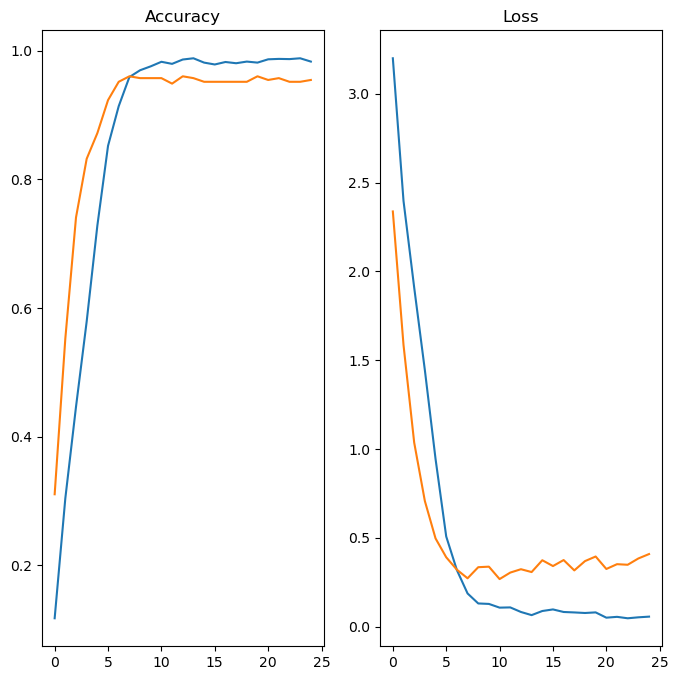

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 51.79


In [20]:
model.save('Image_classify.keras')